<a href="https://colab.research.google.com/github/devikapranesh/Scafolded-Project_DL/blob/main/Scaffolded_Project1_CNN_%26_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scaffolded Project 1.**

# **Fashion MNIST Classification Project**

This project demonstrates how to build and compare two neural network models, a Multilayer Perceptron (MLP) and a Convolutional Neural Network (CNN), for classifying images from the Fashion MNIST dataset. The goal is to identify the best performing model for this image classification task.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


## **1. Setup and Data Loading**

This section handles initial setup, including importing necessary libraries and loading the Fashion MNIST dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


### **1.1 Load and Preprocess Data**

The Fashion MNIST dataset consists of 60,000 training images and 10,000 test images, each a 28x28 grayscale image, associated with a label from 10 classes of clothing items. We load the data and normalize the pixel values from [0, 255] to [0, 1] for better model performance.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']


26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### **1.2 Visualize Sample Images**

Displaying a few sample images from the training set with their corresponding labels to get a visual understanding of the dataset.

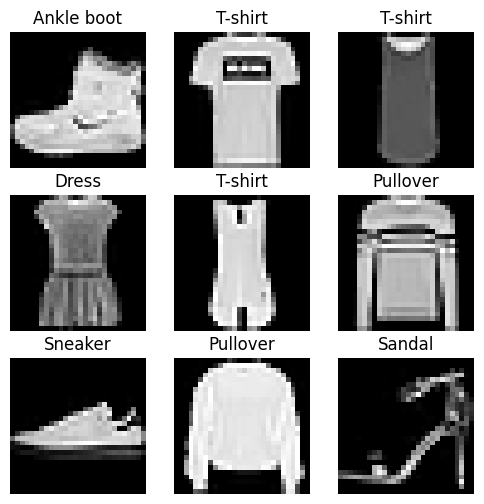

In [ ]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


## **2. Multilayer Perceptron (MLP) Model**

We define, compile, train, and evaluate a simple Multilayer Perceptron (MLP) model. This model uses a `Flatten` layer to convert the 2D images into 1D vectors(28*28= 784), followed by `Dense` layers. A `Dropout` layer is included to mitigate overfitting.

In [ ]:
from tensorflow.keras import layers, models

mlp = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp = mlp.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

mlp_test_loss, mlp_test_acc = mlp.evaluate(x_test, y_test)
print("MLP Accuracy:", mlp_test_acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7471 - loss: 0.7201 - val_accuracy: 0.8482 - val_loss: 0.4092
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8434 - loss: 0.4351 - val_accuracy: 0.8552 - val_loss: 0.3803
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8551 - loss: 0.3972 - val_accuracy: 0.8640 - val_loss: 0.3572
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8622 - loss: 0.3778 - val_accuracy: 0.8687 - val_loss: 0.3553
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8660 - loss: 0.3597 - val_accuracy: 0.8705 - val_loss: 0.3482
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8734 - loss: 0.3489 - val_accuracy: 0.8742 - val_loss: 0.3374
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8745 - loss: 0.3340 - val_accuracy: 0.8780 - val_loss: 0.3343
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8770 - loss: 0.3269 - 

### **2.1 MLP Accuracy Plot**

Visualizing the training and validation accuracy of the MLP model over epochs. This helps in understanding the model's learning progress and identifying potential overfitting.

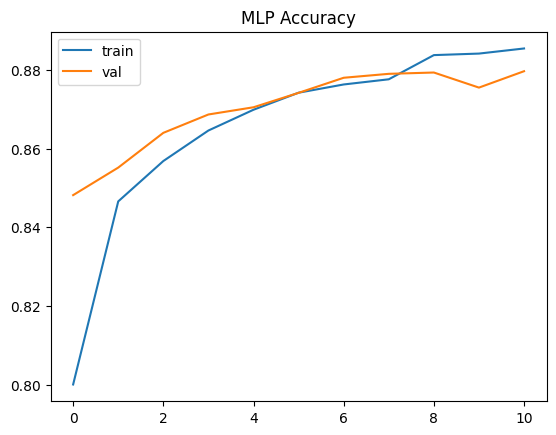

In [ ]:
plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.legend()
plt.title("MLP Accuracy")
plt.show()


## **3. Convolutional Neural Network (CNN) Model**

This section introduces a Convolutional Neural Network (CNN) model, which is typically better suited for image data due to its ability to automatically learn spatial hierarchies of features. The data is reshaped to include a channel dimension for the `Conv2D` layers.

In [ ]:
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = cnn.fit(
    x_train_cnn, y_train,
    epochs=20,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

cnn_loss, cnn_acc = cnn.evaluate(x_test_cnn, y_test)
print("CNN Accuracy:", cnn_acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.7048 - loss: 0.8135 - val_accuracy: 0.8555 - val_loss: 0.3879
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8477 - loss: 0.4288 - val_accuracy: 0.8715 - val_loss: 0.3342
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.8671 - loss: 0.3690 - val_accuracy: 0.8850 - val_loss: 0.3046
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.8798 - loss: 0.3304 - val_accuracy: 0.8937 - val_loss: 0.2768
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.8933 - loss: 0.2942 - val_accuracy: 0.9007 - val_loss: 0.2699
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.8981 - loss: 0.2785 - val_accuracy: 0.9000 - val_loss: 0.2766
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9041 - loss: 0.2586 - val_accuracy: 0.9077 - val_loss: 0.2738
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9073 -

### **3.1 Visualize CNN Predictions**

Displaying a few test images and their predicted labels from the trained CNN model. This provides a qualitative assessment of the model's performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


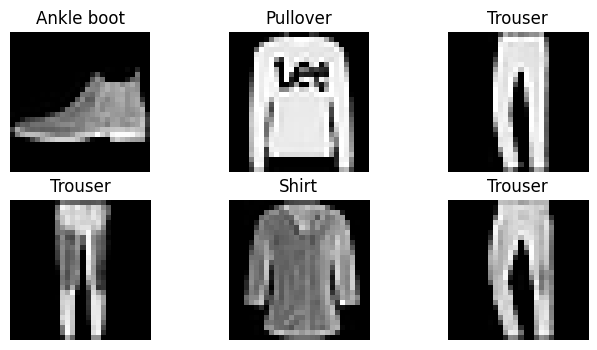

In [ ]:
pred = cnn.predict(x_test_cnn)

plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(class_names[np.argmax(pred[i])])
    plt.axis('off')
plt.show()


## **4. Model Comparison**

This section compares the performance of the MLP and CNN models based on their test accuracy, validation accuracy, and validation loss.

In [ ]:
print("\n===== FINAL METRICS =====")

print(f"MLP Test Accuracy : {mlp_test_acc:.4f}")
print(f"MLP Val Accuracy  : {history_mlp.history['val_accuracy'][-1]:.4f}")
print(f"MLP Val Loss      : {history_mlp.history['val_loss'][-1]:.4f}")

print()

print(f"CNN Test Accuracy : {cnn_acc:.4f}")
print(f"CNN Val Accuracy  : {history_cnn.history['val_accuracy'][-1]:.4f}")
print(f"CNN Val Loss      : {history_cnn.history['val_loss'][-1]:.4f}")



===== FINAL METRICS =====
MLP Test Accuracy : 0.8746
MLP Val Accuracy  : 0.8797
MLP Val Loss      : 0.3351

CNN Test Accuracy : 0.9086
CNN Val Accuracy  : 0.9150
CNN Val Loss      : 0.2672


Accuracy Comparison Graph (MLP vs CNN)

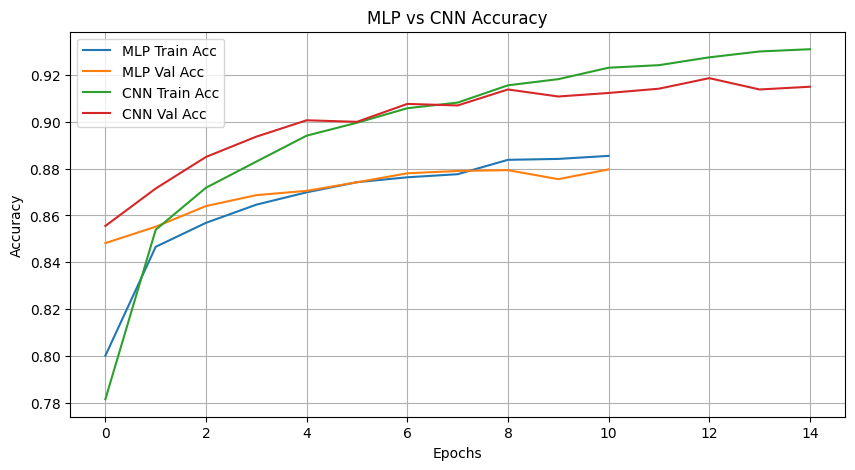

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# MLP
plt.plot(history_mlp.history['accuracy'], label='MLP Train Acc')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Val Acc')

# CNN
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')

plt.title("MLP vs CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
